# SDB Module

## Preface

This is a note of how to use SDB module available in [sdb_gui](https://github.com/rifqiharrys/sdb_gui) and data processing based on the SDB GUI workflow.

## Setup and Preparation

### SDB GUI source code download

Download the source code from [sdb_gui](https://github.com/rifqiharrys/sdb_gui) and extract it to your local drive.

### Python and packages installation

There are many ways to install them, but I prefer using [Miniconda](https://docs.anaconda.com/miniconda/) because of its little installation size. You could refer to https://docs.anaconda.com/miniconda/install/ on how to install miniconda. After conda was installed, open anaconda prompt and create new environment using conda create below. If you read the [README.md](https://github.com/rifqiharrys/sdb_gui/blob/main/README.md) and follow its installation instructions, you could skip this process and continue to install Jupyter Lab.

```bash
    # Replace <ENV_NAME> with a name for your environment
    conda create --name <ENV_NAME>
```
Then activate your new environment and install python 3.12 and the packages. But, to ensure that the packages installed are the latest version, install them from conda forge. To ensure the packages are installed from conda forge, add conda forge as priority channel.

```bash
    conda config --add channels conda-forge
```
Then activate your new environment and install python 3.12 and the packages by typing prompts below.
```bash
    conda activate <ENV_NAME>
    conda install python=3.12 numpy scipy pandas xarray rioxarray geopandas scikit-learn matplotlib
```

In order to run this notebook, you need Jupyter Lab or Jupyter Notebook. In this case, I use Jupyter Lab and to install it in conda, type prompts below.
```bash
    conda install jupyterlab
```

Now that the software preparation is complete, you could open this notebook using browser or using VS Code or another tools of your choice.

### Import

In [1]:
# Add sdb module to path if you're using the source code
import sys
sys.path.append('../')

In [2]:
# Import sdb module
import sdb

### Dataset Information
Prepare your satellite image data and depth sample in a directory and another directory (or not) for the output data. Insert the necessary data information for processing purposes. There are six data identification that is important to the processing. Those are image filename, depth sample filename, depth header name, depth data direction whether it is positive up or down, and header name to differentiate between train and test data and its group name (if any). Type in those values into a suitable key in the dictionary. 

If you have another dataset you want to test, create another dictionary with the same structure and you can easily change between those datasets. It is for this reason that I create a function to administer file location names for input and output and another file tied identification and return it to a dictionary which contain all the necessary information.

In [3]:
# Input and output directory
dir_in = 'data/input/'
dir_out = 'data/output/'

## File information dictionary
# Pulau Karang Bongkok & Pulau Semak Daun
file_1 = {
    'img': 'image.tif',
    'sample': 'depth_sample.shp',
    'depth_header': 'Z_Koreksi',
    'depth_direction': 'down', # positive down
    'train_header': 'note',
    'train_group': 'train'
}

# Kalimantan Selatan (Pulau Laut)
file_2 = {
    'img': 'kalsel_mosaic_band_stack_raster_crop_2.tif',
    'sample': 'Kalsel_Merge_Pasut.shp',
    'depth_header': 'MSL',
    'depth_direction': 'up', # positive up
    'train_header': 'Note',
    'train_group': 'train'
}

# Morotai
file_3 = {
    'img': 'sentinel_morotai_4_bands.tif',
    'sample': 'sbes_morotai_sdb.shp',
    'depth_header': 'MSL', # belum dilihat
    'depth_direction': 'down', # positive up
    'train_header': 'Note',
    'train_group': 'train'
}

def input_metadata(location_dict:dict, input_dir:str, output_dir:str):
    """
    Function to insert all necessary data input metadata based on dictionary structure above.
    This returns to metadata dictionary that will be used in the main script.
    """

    import pprint

    image_location = input_dir + location_dict['img']
    sample_location = input_dir + location_dict['sample']
    new_image_location = output_dir + 'DEM_' + location_dict['img']
    depth_header = location_dict['depth_header']
    train_header = location_dict['train_header']
    train_group = location_dict['train_group']
    depth_direction = location_dict['depth_direction']

    metadata_dict = {
        'image_location': image_location,
        'sample_location': sample_location,
        'new_image_location': new_image_location,
        'depth_header': depth_header,
        'depth_direction': depth_direction,
        'train_header': train_header,
        'train_group': train_group
    }

    pprint.pp(metadata_dict)

    return metadata_dict

# Insert metadata dictionary here
input_dict = input_metadata(file_1, dir_in, dir_out) # Change dict name to change input dataset

{'image_location': 'data/input/image.tif',
 'sample_location': 'data/input/depth_sample.shp',
 'new_image_location': 'data/output/DEM_image.tif',
 'depth_header': 'Z_Koreksi',
 'depth_direction': 'down',
 'train_header': 'note',
 'train_group': 'train'}


## Using SDB Module

### Read Data

In [4]:
# Read geotiff
image = sdb.read_geotiff(input_dict['image_location'])
image

<xarray.DataArray (band: 4, y: 192, x: 344)> Size: 1MB
[264192 values with dtype=float32]
Coordinates:
  * band         (band) int64 32B 1 2 3 4
  * x            (x) float64 3kB 6.718e+05 6.718e+05 ... 6.752e+05 6.752e+05
  * y            (y) float64 2kB 9.372e+06 9.372e+06 ... 9.37e+06 9.37e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   0.0001
    add_offset:     0.0

In [5]:
# Read shapefile
sample = sdb.read_shapefile(input_dict['sample_location'])
sample

,X,Y,Z_Koreksi,note,geometry
0,674380.385,9366136.610,18.189742,train,POINT Z (674380.385 9366136.61 18.19)
1,674381.454,9366136.741,18.499742,train,POINT Z (674381.454 9366136.741 18.5)
2,674379.467,9366136.949,16.609742,train,POINT Z (674379.467 9366136.949 16.61)
3,674382.322,9366137.317,17.929742,train,POINT Z (674382.322 9366137.317 17.93)
4,674378.929,9366137.442,16.189742,train,POINT Z (674378.929 9366137.442 16.19)
...,...,...,...,...,...
10080,673371.323,9371449.837,1.806161,train,POINT Z (673371.323 9371449.837 1.806)
10081,673368.173,9371449.948,1.606161,train,POINT Z (673368.173 9371449.948 1.606)
10082,673370.582,9371450.079,1.766161,train,POINT Z (673370.582 9371450.079 1.766)
10083,673368.959,9371450.110,1.666161,train,POINT Z (673368.959 9371450.11 1.666)


### Preprocessing

In [6]:
# Unravel image data
unraveled_image = sdb.unravel(image)
unraveled_image

,band_1,band_2,band_3,band_4
0,626.0,385.0,265.0,183.0
1,617.0,383.0,261.0,187.0
2,636.0,383.0,249.0,192.0
3,623.0,378.0,261.0,194.0
4,651.0,393.0,266.0,187.0
...,...,...,...,...
66043,608.0,354.0,242.0,180.0
66044,600.0,345.0,236.0,181.0
66045,595.0,354.0,246.0,178.0
66046,609.0,357.0,247.0,176.0


In [7]:
# Reproject vector data if it has different CRS with image data
reprojected_sample = sdb.reproject_vector(image, sample)
reprojected_sample

,X,Y,Z_Koreksi,note,geometry
0,674380.385,9366136.610,18.189742,train,POINT Z (674380.385 9366136.61 18.19)
1,674381.454,9366136.741,18.499742,train,POINT Z (674381.454 9366136.741 18.5)
2,674379.467,9366136.949,16.609742,train,POINT Z (674379.467 9366136.949 16.61)
3,674382.322,9366137.317,17.929742,train,POINT Z (674382.322 9366137.317 17.93)
4,674378.929,9366137.442,16.189742,train,POINT Z (674378.929 9366137.442 16.19)
...,...,...,...,...,...
10080,673371.323,9371449.837,1.806161,train,POINT Z (673371.323 9371449.837 1.806)
10081,673368.173,9371449.948,1.606161,train,POINT Z (673368.173 9371449.948 1.606)
10082,673370.582,9371450.079,1.766161,train,POINT Z (673370.582 9371450.079 1.766)
10083,673368.959,9371450.110,1.666161,train,POINT Z (673368.959 9371450.11 1.666)


`clip_vector` is a function to remove points that is outside image boundary. This function also use `reproject_vector` inside so that the vector data CRS matches that of the image data.

In [8]:
# Clip vector that is located outside image boundary
clipped_sample = sdb.clip_vector(image, sample)
clipped_sample

,X,Y,Z_Koreksi,note,geometry
5451,673089.824,9371020.537,10.644119,test,POINT Z (673089.824 9371020.537 10.644)
5452,673090.677,9371020.627,10.654119,test,POINT Z (673090.677 9371020.627 10.654)
5453,673088.900,9371020.741,10.684119,test,POINT Z (673088.9 9371020.741 10.684)
5454,673091.478,9371020.835,10.314119,test,POINT Z (673091.478 9371020.835 10.314)
5455,673092.281,9371021.078,8.904119,test,POINT Z (673092.281 9371021.078 8.904)
...,...,...,...,...,...
10080,673371.323,9371449.837,1.806161,train,POINT Z (673371.323 9371449.837 1.806)
10081,673368.173,9371449.948,1.606161,train,POINT Z (673368.173 9371449.948 1.606)
10082,673370.582,9371450.079,1.766161,train,POINT Z (673370.582 9371450.079 1.766)
10083,673368.959,9371450.110,1.666161,train,POINT Z (673368.959 9371450.11 1.666)


In [9]:
# Filter by depth of input sample data in positive up direction (default 0 to -12)
depth_filtered_sample = sdb.in_depth_filter(
    clipped_sample,
    header=input_dict['depth_header'],
    depth_direction=input_dict['depth_direction']
)
depth_filtered_sample

,X,Y,Z_Koreksi,note,geometry
0,673089.824,9371020.537,-10.644119,test,POINT Z (673089.824 9371020.537 10.644)
1,673090.677,9371020.627,-10.654119,test,POINT Z (673090.677 9371020.627 10.654)
2,673088.900,9371020.741,-10.684119,test,POINT Z (673088.9 9371020.741 10.684)
3,673091.478,9371020.835,-10.314119,test,POINT Z (673091.478 9371020.835 10.314)
4,673092.281,9371021.078,-8.904119,test,POINT Z (673092.281 9371021.078 8.904)
...,...,...,...,...,...
4629,673371.323,9371449.837,-1.806161,train,POINT Z (673371.323 9371449.837 1.806)
4630,673368.173,9371449.948,-1.606161,train,POINT Z (673368.173 9371449.948 1.606)
4631,673370.582,9371450.079,-1.766161,train,POINT Z (673370.582 9371450.079 1.766)
4632,673368.959,9371450.110,-1.666161,train,POINT Z (673368.959 9371450.11 1.666)


Extract features (raster values) from image based on points location and label (depth values) from sample data. Combine corresponding features and label into one dataframe.

In [10]:
# Extract features from image data
features_and_label = sdb.features_label(image, depth_filtered_sample, input_dict['train_header'])
features_and_label

,band_1,band_2,band_3,band_4,x,y,z
0,740.0,507.0,309.0,189.0,673089.824,9371020.537,test
1,725.0,520.0,296.0,200.0,673090.677,9371020.627,test
2,740.0,507.0,309.0,189.0,673088.900,9371020.741,test
3,725.0,520.0,296.0,200.0,673091.478,9371020.835,test
4,725.0,520.0,296.0,200.0,673092.281,9371021.078,test
...,...,...,...,...,...,...,...
4629,1188.0,1213.0,635.0,189.0,673371.323,9371449.837,train
4630,1188.0,1230.0,727.0,187.0,673368.173,9371449.948,train
4631,1154.0,1141.0,578.0,173.0,673370.582,9371450.079,train
4632,1203.0,1196.0,676.0,177.0,673368.959,9371450.110,train


Splitting train and test data randomly is using `train_test_split` function from scikit-learn. While splitting by selected attribute value is using `groupby` function from pandas. Both `split_random` and `split_attribute` functions including the use of `features_and_label` function inside.

In [11]:
# Split train and test data randomly
random_f_train, random_f_test, random_z_train, random_z_test = sdb.split_random(
    image,
    depth_filtered_sample,
    header=input_dict['depth_header'],
    train_size=0.6
)

In [12]:
# Split train and test data by selected attribute value
selected_f_train, selected_f_test, selected_z_train, selected_z_test = sdb.split_attribute(
    image,
    depth_filtered_sample,
    depth_header=input_dict['depth_header'],
    split_header=input_dict['train_header'],
    group_name=input_dict['train_group']
)

### Depth prediction

Try depth prediction using randomly splitted data.

In [13]:
# Modelling using K-Nearest Neighbors
knn_z_predict = sdb.k_nearest_neighbors(
    unraveled_band=unraveled_image,
    features_train=random_f_train.drop(columns=['x', 'y']), #excluding xy coordinates
    label_train=random_z_train
)
knn_z_predict

array([-10.044119, -10.044119, -10.044119, ..., -10.044119, -10.044119,
       -10.044119], shape=(66048,))

In [14]:
# Modelling using Multiple Linear Regression
mlr_z_predict = sdb.linear_regression(
    unraveled_band=unraveled_image,
    features_train=random_f_train.drop(columns=['x', 'y']), #excluding xy coordinates
    label_train=random_z_train
)
mlr_z_predict

array([-7.29313518, -7.00967199, -7.51169535, ..., -7.16684378,
       -7.54685676, -7.10471956], shape=(66048,))

In [15]:
# Modelling using Random Forest
rf_z_predict = sdb.random_forest(
    unraveled_band=unraveled_image,
    features_train=random_f_train.drop(columns=['x', 'y']), #excluding xy coordinates
    label_train=random_z_train
)
rf_z_predict

array([-9.12277085, -9.12277085, -9.19545584, ..., -9.12277085,
       -9.12277085, -9.12277085], shape=(66048,))

### Post Processing

In [16]:
# Filter prediction output based on depth (default 0 to -12)
depth_filtered_z_predict = sdb.out_depth_filter(mlr_z_predict)

To evaluate depth prediction result, we need to have the test data containing depth information (`z_test`) and depth prediction data at the same location. To do so, we need to reshape depth prediction data to image shape and create new dataarray from reshaped depth prediction data and do a point sampling using test data xy coordinates.

In [17]:
# Reshape predicted depth array to image shape
rf_az_predict = sdb.reshape_prediction(
    rf_z_predict,
    image
)

In [18]:
# Create new dataarray from predicted depth array
rf_daz_predict = sdb.array_to_dataarray(
    rf_az_predict,
    image
)
# Assign new coordinate align with 'band' called 'band_name' (optional)
rf_daz_predict = rf_daz_predict.assign_coords(band_name=('band', ['original']))
rf_daz_predict

<xarray.DataArray (band: 1, y: 192, x: 344)> Size: 528kB
array([[[-9.12277085, -9.12277085, -9.19545584, ..., -9.12277085,
         -9.12277085, -9.12277085],
        [-9.12277085, -9.12277085, -9.12277085, ..., -9.12277085,
         -9.19545584, -9.12277085],
        [-9.12277085, -9.19545584, -9.12277085, ..., -9.12277085,
         -9.12277085, -9.12277085],
        ...,
        [-9.28773276, -9.28773276, -9.28773276, ..., -9.12277085,
         -9.12277085, -9.12277085],
        [-9.12277085, -9.30596824, -9.24490047, ..., -9.12277085,
         -9.12277085, -9.12277085],
        [-9.24490047, -9.24490047, -9.24490047, ..., -9.12277085,
         -9.12277085, -9.12277085]]], shape=(1, 192, 344))
Coordinates:
  * band         (band) int64 8B 1
  * y            (y) float64 2kB 9.372e+06 9.372e+06 ... 9.37e+06 9.37e+06
  * x            (x) float64 3kB 6.718e+05 6.718e+05 ... 6.752e+05 6.752e+05
    spatial_ref  int64 8B 0
    band_name    (band) <U8 32B 'original'

In [19]:
# Point sampling
rf_dfz_predict = sdb.point_sampling(
    rf_daz_predict,
    x=random_f_test.x,
    y=random_f_test.y,
    include_xy=False
)
rf_dfz_predict

,band_1
0,-1.244260
1,-1.542147
2,-2.164496
3,-1.933608
4,-5.179009
...,...
1849,-0.836079
1850,-5.715575
1851,-0.934894
1852,-0.667393


In [20]:
# Calculate RMSE, MAE, and R squared value
rmse, mae, r2 = sdb.evaluate(
    true_val=random_z_test,
    pred_val=rf_dfz_predict['band_1'] #default first column name
)

print(f'RMSE:\t {round(rmse, 3)}')
print(f'MAE:\t {round(mae, 3)}')
print(f'R\u00B2:\t {round(r2, 3)}')

RMSE:	 0.328
MAE:	 0.184
R²:	 0.977


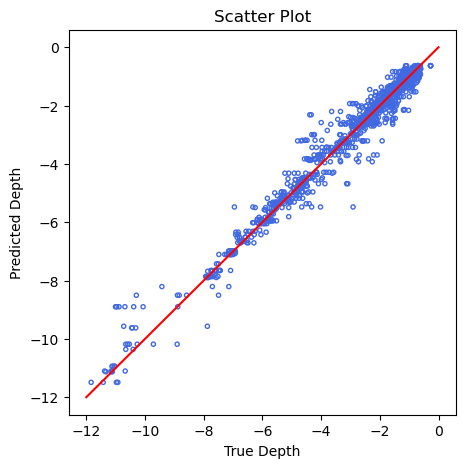

In [21]:
# Create scatter plotter
fig, ax = sdb.scatter_plotter(
    true_val=random_z_test,
    pred_val=rf_dfz_predict['band_1']
)

In [22]:
# Applying median filter with the size of 3to the predicted depth array
rf_az_predict_median = sdb.median_filter(
    rf_daz_predict.values[0],
    filter_size=5
)
rf_az_predict_median

array([[-9.12277085, -9.12277085, -9.12277085, ..., -9.12277085,
        -9.12277085, -9.12277085],
       [-9.12277085, -9.12277085, -9.12277085, ..., -9.12277085,
        -9.12277085, -9.12277085],
       [-9.12277085, -9.12277085, -9.12277085, ..., -9.12277085,
        -9.12277085, -9.12277085],
       ...,
       [-9.24490047, -9.24490047, -9.24490047, ..., -9.12277085,
        -9.12277085, -9.12277085],
       [-9.24490047, -9.24490047, -9.24490047, ..., -9.12277085,
        -9.12277085, -9.12277085],
       [-9.24490047, -9.24490047, -9.24490047, ..., -9.12277085,
        -9.12277085, -9.12277085]], shape=(192, 344))

In [23]:
# Assign new median filtered array to a dataarray
rf_daz_predict_median = sdb.array_to_dataarray(
    rf_az_predict_median,
    image
)
# Assign new coordinate align with 'band' called 'band_name' (optional)
rf_daz_predict_median = rf_daz_predict_median.assign_coords(band_name=('band', ['median_5']))
rf_daz_predict_median

<xarray.DataArray (band: 1, y: 192, x: 344)> Size: 528kB
array([[[-9.12277085, -9.12277085, -9.12277085, ..., -9.12277085,
         -9.12277085, -9.12277085],
        [-9.12277085, -9.12277085, -9.12277085, ..., -9.12277085,
         -9.12277085, -9.12277085],
        [-9.12277085, -9.12277085, -9.12277085, ..., -9.12277085,
         -9.12277085, -9.12277085],
        ...,
        [-9.24490047, -9.24490047, -9.24490047, ..., -9.12277085,
         -9.12277085, -9.12277085],
        [-9.24490047, -9.24490047, -9.24490047, ..., -9.12277085,
         -9.12277085, -9.12277085],
        [-9.24490047, -9.24490047, -9.24490047, ..., -9.12277085,
         -9.12277085, -9.12277085]]], shape=(1, 192, 344))
Coordinates:
  * band         (band) int64 8B 1
  * y            (y) float64 2kB 9.372e+06 9.372e+06 ... 9.37e+06 9.37e+06
  * x            (x) float64 3kB 6.718e+05 6.718e+05 ... 6.752e+05 6.752e+05
    spatial_ref  int64 8B 0
    band_name    (band) <U8 32B 'median_5'

In [24]:
# Merge original and median filtered dataarray for convenience
import xarray as xr
rf_daz_predict_all = xr.concat([rf_daz_predict, rf_daz_predict_median], dim='band')

# Reset band values
rf_daz_predict_all.coords['band'] = [i + 1 for i in range(len(rf_daz_predict_all.band.values))]
rf_daz_predict_all

<xarray.DataArray (band: 2, y: 192, x: 344)> Size: 1MB
array([[[-9.12277085, -9.12277085, -9.19545584, ..., -9.12277085,
         -9.12277085, -9.12277085],
        [-9.12277085, -9.12277085, -9.12277085, ..., -9.12277085,
         -9.19545584, -9.12277085],
        [-9.12277085, -9.19545584, -9.12277085, ..., -9.12277085,
         -9.12277085, -9.12277085],
        ...,
        [-9.28773276, -9.28773276, -9.28773276, ..., -9.12277085,
         -9.12277085, -9.12277085],
        [-9.12277085, -9.30596824, -9.24490047, ..., -9.12277085,
         -9.12277085, -9.12277085],
        [-9.24490047, -9.24490047, -9.24490047, ..., -9.12277085,
         -9.12277085, -9.12277085]],

       [[-9.12277085, -9.12277085, -9.12277085, ..., -9.12277085,
         -9.12277085, -9.12277085],
        [-9.12277085, -9.12277085, -9.12277085, ..., -9.12277085,
         -9.12277085, -9.12277085],
        [-9.12277085, -9.12277085, -9.12277085, ..., -9.12277085,
         -9.12277085, -9.12277085],
        ...,
        [-9.24490047, -9.24490047, -9.24490047, ..., -9.12277085,
         -9.12277085, -9.12277085],
        [-9.24490047, -9.24490047, -9.24490047, ..., -9.12277085,
         -9.12277085, -9.12277085],
        [-9.24490047, -9.24490047, -9.24490047, ..., -9.12277085,
         -9.12277085, -9.12277085]]], shape=(2, 192, 344))
Coordinates:
  * y            (y) float64 2kB 9.372e+06 9.372e+06 ... 9.37e+06 9.37e+06
  * x            (x) float64 3kB 6.718e+05 6.718e+05 ... 6.752e+05 6.752e+05
    spatial_ref  int64 8B 0
    band_name    (band) <U8 64B 'original' 'median_5'
  * band         (band) int64 16B 1 2

In [25]:
# Reset band values
rf_daz_predict_all.coords['band'] = [i + 1 for i in range(len(rf_daz_predict_all.band.values))]
rf_daz_predict_all

<xarray.DataArray (band: 2, y: 192, x: 344)> Size: 1MB
array([[[-9.12277085, -9.12277085, -9.19545584, ..., -9.12277085,
         -9.12277085, -9.12277085],
        [-9.12277085, -9.12277085, -9.12277085, ..., -9.12277085,
         -9.19545584, -9.12277085],
        [-9.12277085, -9.19545584, -9.12277085, ..., -9.12277085,
         -9.12277085, -9.12277085],
        ...,
        [-9.28773276, -9.28773276, -9.28773276, ..., -9.12277085,
         -9.12277085, -9.12277085],
        [-9.12277085, -9.30596824, -9.24490047, ..., -9.12277085,
         -9.12277085, -9.12277085],
        [-9.24490047, -9.24490047, -9.24490047, ..., -9.12277085,
         -9.12277085, -9.12277085]],

       [[-9.12277085, -9.12277085, -9.12277085, ..., -9.12277085,
         -9.12277085, -9.12277085],
        [-9.12277085, -9.12277085, -9.12277085, ..., -9.12277085,
         -9.12277085, -9.12277085],
        [-9.12277085, -9.12277085, -9.12277085, ..., -9.12277085,
         -9.12277085, -9.12277085],
        ...,
        [-9.24490047, -9.24490047, -9.24490047, ..., -9.12277085,
         -9.12277085, -9.12277085],
        [-9.24490047, -9.24490047, -9.24490047, ..., -9.12277085,
         -9.12277085, -9.12277085],
        [-9.24490047, -9.24490047, -9.24490047, ..., -9.12277085,
         -9.12277085, -9.12277085]]], shape=(2, 192, 344))
Coordinates:
  * y            (y) float64 2kB 9.372e+06 9.372e+06 ... 9.37e+06 9.37e+06
  * x            (x) float64 3kB 6.718e+05 6.718e+05 ... 6.752e+05 6.752e+05
    spatial_ref  int64 8B 0
    band_name    (band) <U8 64B 'original' 'median_5'
  * band         (band) int64 16B 1 2